In [1]:
# Dependencies
import pandas as pd

import numpy as np
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# My own tinkering.

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [6]:
result = engine.execute('SELECT "date", "tobs" FROM '
                        '"measurement" ORDER BY "date" LIMIT 5')
for x in result:
    print(x)

('2010-01-01', 65.0)
('2010-01-01', 67.0)
('2010-01-01', 72.0)
('2010-01-01', 75.0)
('2010-01-01', 70.0)


## D1: Determine the Summary Statistics for June

In [7]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. )
jun_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "06")

In [8]:
#  3. Convert the June temperatures to a list.
# results = session.query(Measurement.date, Measurement.tobs).all()
print(jun_results.all())

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [9]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
jun_df = pd.DataFrame(jun_results, columns=['Date','June Temps'])
jun_df.set_index(jun_df['Date'], inplace=True)
print(jun_df.to_string(index=False))

      Date  June Temps
2010-06-01        78.0
2010-06-02        76.0
2010-06-03        78.0
2010-06-04        76.0
2010-06-05        77.0
2010-06-06        78.0
2010-06-07        77.0
2010-06-08        78.0
2010-06-09        78.0
2010-06-10        79.0
2010-06-11        78.0
2010-06-12        78.0
2010-06-13        78.0
2010-06-14        77.0
2010-06-15        78.0
2010-06-16        78.0
2010-06-17        77.0
2010-06-18        77.0
2010-06-19        82.0
2010-06-20        78.0
2010-06-21        78.0
2010-06-22        78.0
2010-06-23        78.0
2010-06-24        78.0
2010-06-25        77.0
2010-06-26        76.0
2010-06-27        78.0
2010-06-28        78.0
2010-06-29        78.0
2010-06-30        78.0
2011-06-01        77.0
2011-06-02        78.0
2011-06-03        73.0
2011-06-04        70.0
2011-06-05        76.0
2011-06-06        77.0
2011-06-07        77.0
2011-06-08        77.0
2011-06-09        77.0
2011-06-10        78.0
2011-06-11        77.0
2011-06-12        77.0
2011-06-13 

In [10]:
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [11]:
jun_df.head()

,Date,June Temps
Date,,
2010-06-01,2010-06-01,78.0
2010-06-02,2010-06-02,76.0
2010-06-03,2010-06-03,78.0
2010-06-04,2010-06-04,76.0
2010-06-05,2010-06-05,77.0


In [12]:
jun_df = jun_df.sort_index()
print(jun_df.to_string(index=False))

      Date  June Temps
2010-06-01        78.0
2010-06-01        73.0
2010-06-01        77.0
2010-06-01        69.0
2010-06-01        76.0
2010-06-01        71.0
2010-06-01        74.0
2010-06-01        70.0
2010-06-01        74.0
2010-06-02        78.0
2010-06-02        70.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        71.0
2010-06-02        76.0
2010-06-02        76.0
2010-06-02        72.0
2010-06-02        76.0
2010-06-03        74.0
2010-06-03        78.0
2010-06-03        73.0
2010-06-03        72.0
2010-06-03        77.0
2010-06-03        76.0
2010-06-03        75.0
2010-06-03        78.0
2010-06-03        67.0
2010-06-04        73.0
2010-06-04        75.0
2010-06-04        75.0
2010-06-04        76.0
2010-06-04        73.0
2010-06-04        68.0
2010-06-04        72.0
2010-06-04        70.0
2010-06-04        74.0
2010-06-05        73.0
2010-06-05        77.0
2010-06-05        78.0
2010-06-05        76.0
2010-06-05        72.0
2010-06-05        79.0
2010-06-05 

<AxesSubplot:xlabel='Date'>

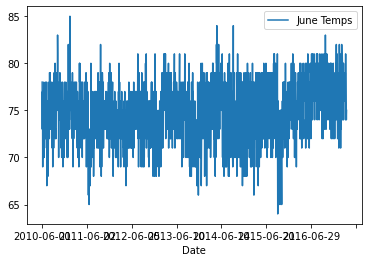

In [28]:
jun_df.plot()

In [14]:
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [15]:
jun_df.head()

,Date,June Temps
Date,,
2010-06-01,2010-06-01,78.0
2010-06-01,2010-06-01,73.0
2010-06-01,2010-06-01,77.0
2010-06-01,2010-06-01,69.0
2010-06-01,2010-06-01,76.0


In [16]:
jun_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1700 entries, 2010-06-01 to 2017-06-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1700 non-null   object 
 1   June Temps  1700 non-null   float64
dtypes: float64(1), object(1)
memory usage: 39.8+ KB


In [17]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
jun_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = session.query(Measurement.date, Measurement.tobs).filter(func.strftime("%m", Measurement.date) == "12")

In [19]:
# 7. Convert the December temperatures to a list.
print(dec_results.all())

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [20]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['Date','December Temps'])
dec_df.set_index(dec_df['Date'], inplace=True)
print(dec_df.to_string(index=False))

      Date  December Temps
2010-12-01            76.0
2010-12-03            74.0
2010-12-04            74.0
2010-12-06            64.0
2010-12-07            64.0
2010-12-08            67.0
2010-12-09            77.0
2010-12-10            66.0
2010-12-11            69.0
2010-12-12            68.0
2010-12-13            68.0
2010-12-14            71.0
2010-12-15            74.0
2010-12-16            67.0
2010-12-17            66.0
2010-12-18            69.0
2010-12-19            71.0
2010-12-23            70.0
2010-12-24            70.0
2010-12-26            74.0
2010-12-27            74.0
2010-12-28            71.0
2010-12-29            75.0
2010-12-30            75.0
2010-12-31            72.0
2011-12-01            69.0
2011-12-02            68.0
2011-12-03            73.0
2011-12-04            74.0
2011-12-05            73.0
2011-12-06            73.0
2011-12-07            73.0
2011-12-08            73.0
2011-12-09            71.0
2011-12-10            73.0
2011-12-11            73.0
2

In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.head()

,Date,December Temps
Date,,
2010-12-01,2010-12-01,76.0
2010-12-03,2010-12-03,74.0
2010-12-04,2010-12-04,74.0
2010-12-06,2010-12-06,64.0
2010-12-07,2010-12-07,64.0


In [22]:
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [23]:
dec_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 2010-12-01 to 2016-12-31
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1517 non-null   object 
 1   December Temps  1517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.6+ KB


<AxesSubplot:xlabel='Date'>

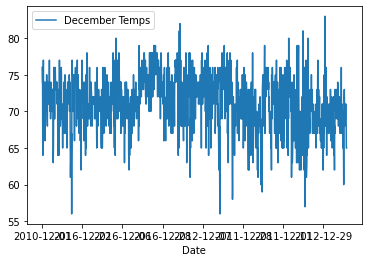

In [24]:
dec_df.plot()